In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

In [2]:
# Importación de librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [4]:
# Carga del dataset original

df = pd.read_csv("../data/climate_change_impact_on_agriculture_2024.csv")
print("Registros iniciales:", len(df))
df.head()


Registros iniciales: 10000


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [5]:
# Limpieza de nombres de columnas

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Columnas normalizadas:")
print(list(df.columns))

Columnas normalizadas:
['year', 'country', 'region', 'crop_type', 'average_temperature_c', 'total_precipitation_mm', 'co2_emissions_mt', 'crop_yield_mt_per_ha', 'extreme_weather_events', 'irrigation_access_%', 'pesticide_use_kg_per_ha', 'fertilizer_use_kg_per_ha', 'soil_health_index', 'adaptation_strategies', 'economic_impact_million_usd']


In [6]:
# Eliminación de duplicados

df.drop_duplicates(inplace=True)
print("Registros despues de eliminar duplicados:", len(df))

Registros despues de eliminar duplicados: 10000


In [7]:
# Estandarización de formato de texto

df['country'] = df['country'].str.strip().str.title()
df['region'] = df['region'].str.strip().str.title()
df['crop_type'] = df['crop_type'].str.strip().str.capitalize()
df['adaptation_strategies'] = df['adaptation_strategies'].str.strip().str.title()

In [8]:
# Filtrado por rango válido de temperatura

df = df[(df['average_temperature_c'] > -10) & (df['average_temperature_c'] < 60)]
print("Registros despues de filtrar temperaturas:", len(df))


Registros despues de filtrar temperaturas: 10000


In [9]:

# Conversión a tipo numérico

numeric_cols = [
    'average_temperature_c', 'total_precipitation_mm', 'co2_emissions_mt',
    'crop_yield_mt_per_ha', 'extreme_weather_events', 'irrigation_access_%',
    'pesticide_use_kg_per_ha', 'fertilizer_use_kg_per_ha',
    'soil_health_index', 'economic_impact_million_usd'
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [10]:

# Imputación de valores faltantes

df.fillna(df.mean(numeric_only=True), inplace=True)
print("Valores faltantes despues de imputacion:", df.isna().sum().sum())

Valores faltantes despues de imputacion: 0


In [12]:
# Exportación del dataset limpio

df.to_csv("../data/dataset_unificado.csv", index=False)
print("Limpieza completada correctamente")
print("Registros finales:", len(df))
print("Columnas finales:", list(df.columns))

Limpieza completada correctamente
Registros finales: 10000
Columnas finales: ['year', 'country', 'region', 'crop_type', 'average_temperature_c', 'total_precipitation_mm', 'co2_emissions_mt', 'crop_yield_mt_per_ha', 'extreme_weather_events', 'irrigation_access_%', 'pesticide_use_kg_per_ha', 'fertilizer_use_kg_per_ha', 'soil_health_index', 'adaptation_strategies', 'economic_impact_million_usd']


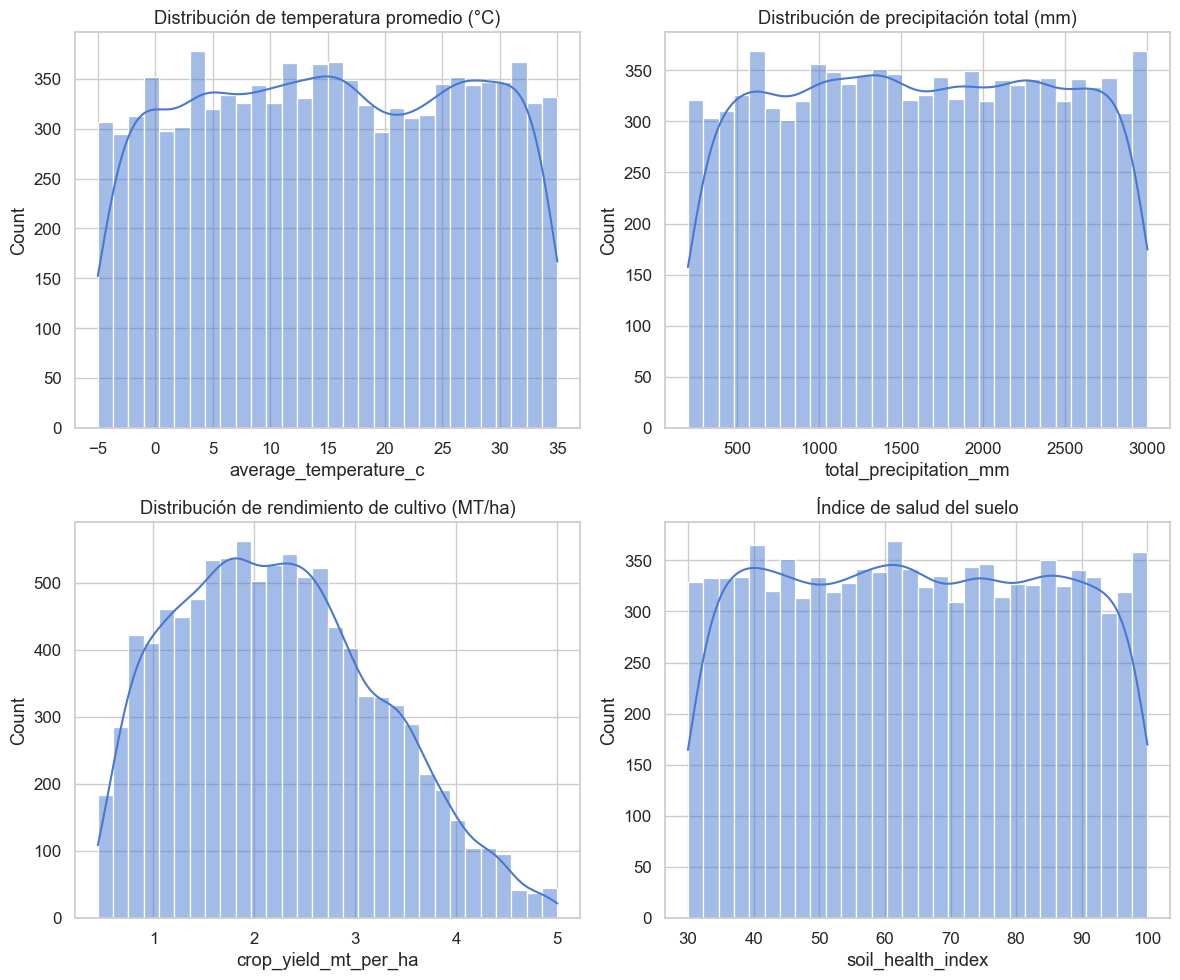

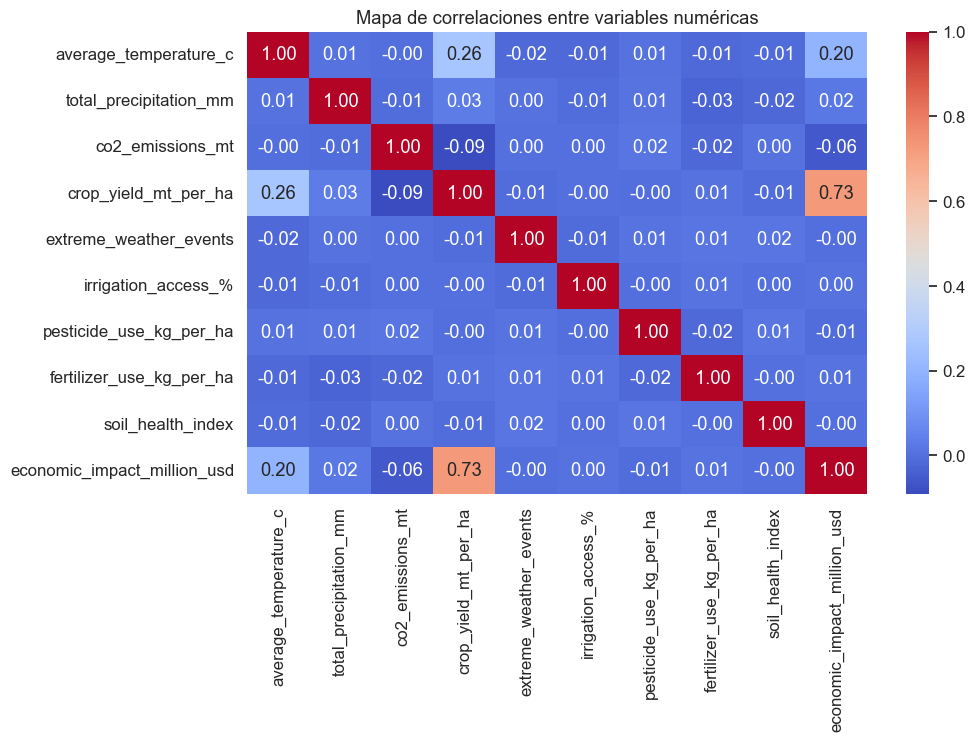

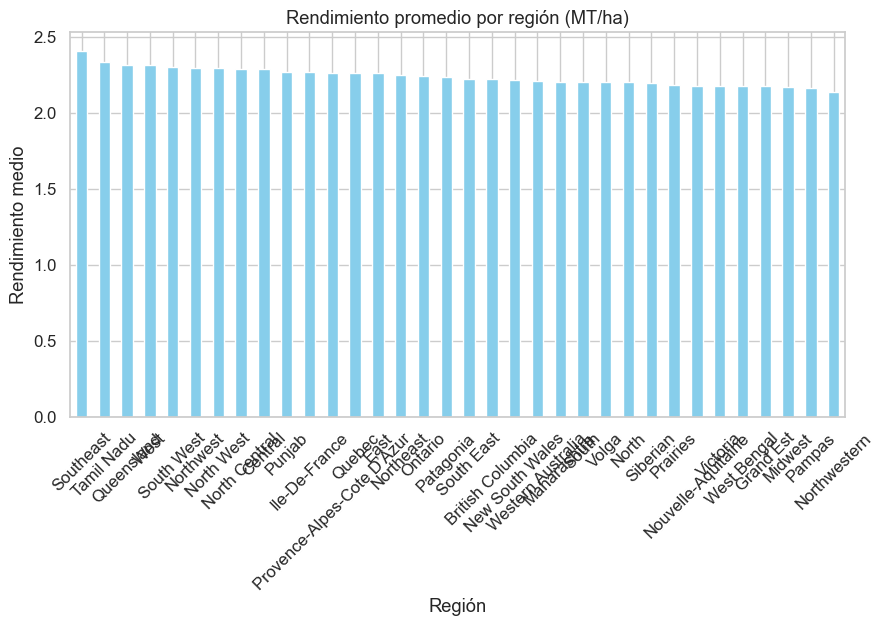

In [13]:
# Análisis exploratorio

df.describe().T

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['average_temperature_c'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribución de temperatura promedio (°C)")

sns.histplot(df['total_precipitation_mm'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribución de precipitación total (mm)")

sns.histplot(df['crop_yield_mt_per_ha'], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribución de rendimiento de cultivo (MT/ha)")

sns.histplot(df['soil_health_index'], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Índice de salud del suelo")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlaciones entre variables numéricas")
plt.show()

yield_by_region = df.groupby("region")["crop_yield_mt_per_ha"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
yield_by_region.plot(kind="bar", color="skyblue")
plt.title("Rendimiento promedio por región (MT/ha)")
plt.ylabel("Rendimiento medio")
plt.xlabel("Región")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Interpretación general

print("""
      Conclusiones:

- Se logró unificar el dataset y limpiar los registros inconsistentes.
- Las temperaturas fuera del rango (-10, 60 °C) fueron descartadas.
- Los valores faltantes fueron reemplazados por la media de cada columna.
- Se observan correlaciones entre:
  • Aumento de temperatura y reducción de rendimiento agrícola.
  • Mayor acceso a irrigación y mejor salud del suelo.
- Las regiones con mejores rendimientos suelen tener mayores índices de salud del suelo y acceso a recursos hídricos.
""")